In [13]:
import pandas as pd
import numpy as  np
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
df = pd.read_csv("D:\DESKTOP\Cogntive Analytics\Experiments\Datasets\self noise.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\wajid\AppData\Local\Temp\ipykernel_13780\415110540.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DESKTOP\Cogntive Analytics\Experiments\Datasets\self noise.csv")


,Frquency(Hz),Angle_of_Attack,Chord_Length,Free_stream_velocity,Displacement,Sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [15]:
correlation_matrix=df.corr()
print(correlation_matrix)

                      Frquency(Hz)  Angle_of_Attack  Chord_Length  \
Frquency(Hz)              1.000000        -0.272765     -0.003661   
Angle_of_Attack          -0.272765         1.000000     -0.504868   
Chord_Length             -0.003661        -0.504868      1.000000   
Free_stream_velocity      0.133664         0.058760      0.003787   
Displacement             -0.230107         0.753394     -0.220842   
Sound_pressure_level     -0.390711        -0.156108     -0.236162   

                      Free_stream_velocity  Displacement  Sound_pressure_level  
Frquency(Hz)                      0.133664     -0.230107             -0.390711  
Angle_of_Attack                   0.058760      0.753394             -0.156108  
Chord_Length                      0.003787     -0.220842             -0.236162  
Free_stream_velocity              1.000000     -0.003974              0.125103  
Displacement                     -0.003974      1.000000             -0.312670  
Sound_pressure_level          

In [16]:
X = df.drop(columns=['Sound_pressure_level'])
X=sm.add_constant(X)
y=df['Sound_pressure_level']
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)
Linear_Regression=sm.OLS(y_train, X_train).fit()


In [17]:
y_pred = Linear_Regression.predict(X_test)
r_squared = r2_score(y_test, y_pred)
adj_r_squared = Linear_Regression.rsquared_adj
f_statistic = Linear_Regression.fvalue
p_value = Linear_Regression.f_pvalue
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adj_r_squared}")
print(f"F-statistics: {f_statistic}, p-value: {p_value}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")



R-squared: 0.5582979754896911
Adjusted R-squared: 0.5013716488971148
F-statistics: 242.52150554359076, p-value: 6.080414968967961e-179
MSE: 22.128643318249154
RMSE: 4.704109194975087
MAE: 3.672414564174714


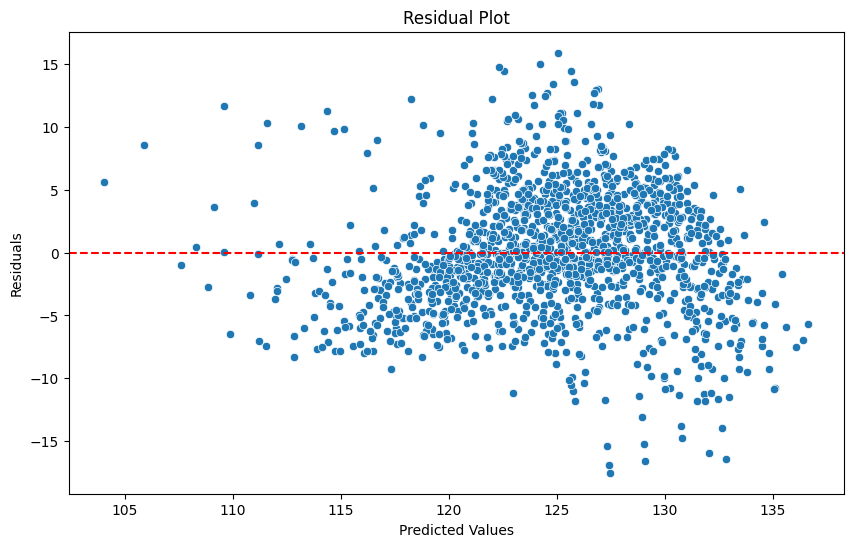

In [18]:
features = df.drop(columns=['Sound_pressure_level'])
df_with_const = sm.add_constant(features)
df['Predicted'] = Linear_Regression.predict(df_with_const)
df['Residuals'] = df['Sound_pressure_level'] - df['Predicted']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted', y='Residuals', data=df)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()
